<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tunneling" data-toc-modified-id="Tunneling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tunneling</a></span><ul class="toc-item"><li><span><a href="#Plot-Tunneling-Coefficient" data-toc-modified-id="Plot-Tunneling-Coefficient-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot Tunneling Coefficient</a></span></li><li><span><a href="#Interactive" data-toc-modified-id="Interactive-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Interactive</a></span><ul class="toc-item"><li><span><a href="#Plot-Tunneling-for-different-values-of-Plancks-constant" data-toc-modified-id="Plot-Tunneling-for-different-values-of-Plancks-constant-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Plot Tunneling for different values of Plancks constant</a></span></li></ul></li></ul></li><li><span><a href="#Ramsauer-Townsend-Effect" data-toc-modified-id="Ramsauer-Townsend-Effect-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ramsauer Townsend Effect</a></span><ul class="toc-item"><li><span><a href="#Interactive" data-toc-modified-id="Interactive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interactive</a></span></li></ul></li></ul></div>

In this notebook we need to change between matplotlib notebook for interactive plotting and matplotlib inline for standard plotting.

NB! We use natural units throughout here. That is we let hbar = c = 1.

Other quantities are then expressed in relation to hbar and c. To get SI units we have to simply change values for hbar, m V0 etc.

# Tunneling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

## Plot Tunneling Coefficient

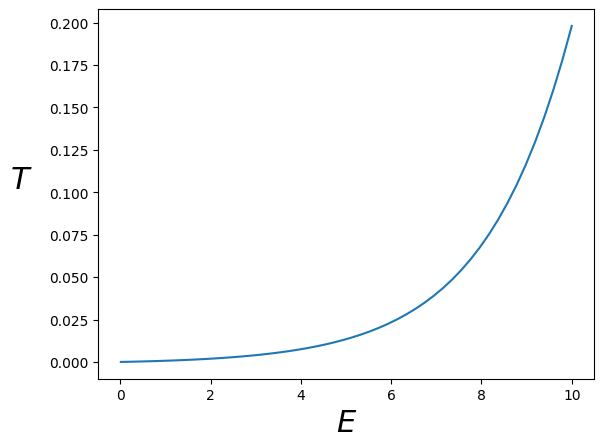

In [40]:
E = np.linspace(0.01, 9.999999)
V0 = 10
m = 1 
hbar = 1 

a = 0.9
k = np.sqrt(2*m*E) / hbar
kappa = np.sqrt(2*m*(V0-E)) / hbar

def T(k, kappa, a):
    return 1 / ( 1 + ( k**2 + kappa**2 )**2/(4*k**2*kappa**2) * np.sinh(kappa * a)**2  )

plt.plot(E, T(k, kappa, a))
plt.xlabel(r"$E$", fontsize=22)
plt.ylabel(r"$T$", fontsize=22, rotation=0, labelpad=20)
plt.show()

## Interactive

Need ipywidget module for this to work.

In [12]:
import ipywidgets 
%matplotlib notebook
%matplotlib notebook
plt.style.use("default")

<IPython.core.display.Javascript object>


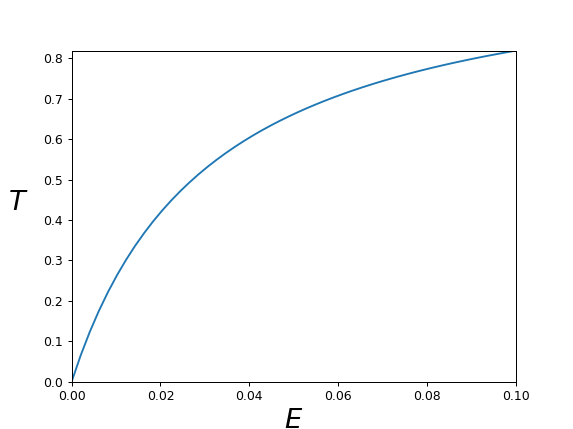

interactive(children=(FloatSlider(value=2.35, description='a', max=5.0, min=0.1, step=0.25), FloatSlider(value…

In [13]:
line, = plt.plot(E, T(k, kappa, a))
plt.xlabel(r"$E$", fontsize=22)
plt.ylabel(r"$T$", fontsize=22, rotation=0, labelpad=20)

def plot_T(a=(0.1, 5, 0.25), V0=(0.1, 10, 1)):
    E = np.linspace(1E-6, V0 - 1E-4)
    k = np.sqrt(2*m*E) / hbar
    kappa = np.sqrt(2*m*(V0-E)) / hbar
    line.set_ydata(T(k, kappa, a))
    line.set_xdata(E)
    plt.draw()
    plt.xlim(0, V0)
    plt.ylim(0, T(k ,kappa, a).max())
    
ipywidgets.interact(plot_T);

### Plot Tunneling for different values of Plancks constant

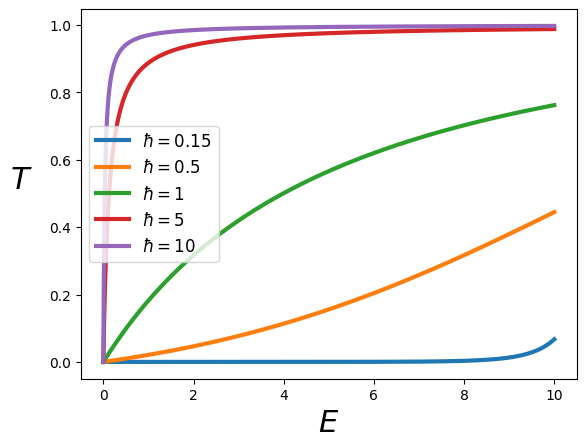

In [47]:
E = np.linspace(1e-15, 10-1e-15, int(1e4))
V0 = 10
a = 0.25
m = 1 

for hbar in [0.15, 0.5, 1, 5, 10]:
    k = np.sqrt(2*m*E) / hbar
    kappa = np.sqrt(2*m*(V0-E)) / hbar

    plt.plot(E, T(k, kappa, a), label=f"$\\hbar=${hbar}", lw=3)

plt.legend(fontsize=12)
plt.xlabel(r"$E$", fontsize=22)
plt.ylabel(r"$T$", fontsize=22, rotation=0, labelpad=20)
plt.show()

# Ramsauer Townsend Effect

In [26]:
%matplotlib inline
plt.style.use("default")

In [35]:
E = np.linspace(0.001, 10, int(1e6))
V0 = 5
m = 1 
a = 2 
hbar = 1 

k2 = 2*m*E / hbar**2
kappa2 = -2*m*(E + V0) / hbar**2
kappa_ = np.sqrt(2*m*(E+V0)) / hbar

def RamsauerTownsend(k2, kappa2, kappa_, a):
    return 1 / ( 1 -  np.sin(kappa_ * a)**2 * ( k2 + kappa2 )**2 / (4 * k2 * kappa2) )

plt.plot(E, RamsauerTownsend(k2, kappa2, kappa_, a))
plt.xlabel(r"$E$", fontsize=22)
plt.ylabel(r"$T$", fontsize=22, rotation=0, labelpad=20)
plt.show()

## Interactive

Need ipywidgets for this to work

In [37]:
import ipywidgets 
%matplotlib notebook
%matplotlib notebook
plt.style.use("default")

In [38]:
E = np.linspace(0.001, 10, int(1e6))
V0 = 5
m = 1 
a = 2 
hbar = 1 

def plot_RT(a=(0.1, 5, 0.1), V0=(0.1, 10, 0.5)):
    k2 = 2*m*E / hbar**2
    kappa2 = -2*m*(E + V0) / hbar**2
    kappa_ = np.sqrt(2*m*(E+V0)) / hbar
    plt.axvline([V0], alpha=0.5)
    plt.plot(E, RamsauerTownsend(k2, kappa2, kappa_, a))
    plt.xlabel(r"$E$", fontsize=22)
    plt.ylabel(r"$T$", fontsize=22, rotation=0, labelpad=20)
    plt.xlim(0, E.max())
    plt.ylim(0, RamsauerTownsend(k2, kappa2, kappa_, a).max())
    
ipywidgets.interact(plot_RT);

interactive(children=(FloatSlider(value=2.5000000000000004, description='a', max=5.0, min=0.1), FloatSlider(va…